In [1]:
print("hello world")

hello world


In [2]:
import numpy as np

In [3]:

def read_pbm(filename):
    with open(filename, 'r', encoding = 'utf-8') as f:

        # Read the header
        magic_number = f.readline().strip()
        if magic_number != 'P1':
            raise ValueError("File is not a valid ASCII PBM (P1) file.")
        
        # Skip comments
        line = f.readline()
        while line.startswith('#'):
            line = f.readline()
        
        # Read dimensions
        width, height = map(int, line.split())
        
        # Read pixel data
        pixels = []
        for line in f:
            pixels.extend(line.split())
        
    # Convert to numpy array and reshape
    image = np.array(pixels, dtype=int).reshape((height, width))
    return image

In [5]:
a = read_pbm("test.pbm")

In [6]:
a

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

KeyboardInterrupt: 

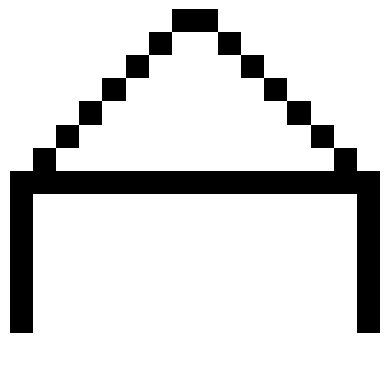

In [7]:
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import time

plt.ion()
fig, ax = plt.subplots()

while True:
    # Update your NumPy array here
    # For example: image_array = read_pbm("updated_image.pbm")
    ax.clear()
    ax.set_axis_off()
    ax.imshow(a, cmap='binary')
    display(fig)
    clear_output(wait=True)
    time.sleep(0.1)

In [8]:
a = a.flatten()
a[a==0] = -1

In [19]:
a.size

256

In [20]:
weights = np.zeros((256, 256))

In [21]:
for i in range(256):
    for j in range(256):
         weights[i][j] = a[i] * a[j]

In [ ]:
##a @ a.T

In [22]:
weights

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [23]:
for i in range(256):
    weights[i][i] = 0

In [24]:
weights

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [58]:
dist = read_pbm("dist.pbm")
dist = dist.flatten()

In [59]:
dist

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
theta = 0.5

In [44]:
a = dist
for _ in range(10):
    for i in range(256):
        sum = 0
        for j in range(256):
            sum += weights[i][j] * a[j]
        
        if sum > theta:
            a[i] = 1
    
    #code to update display



KeyboardInterrupt: 

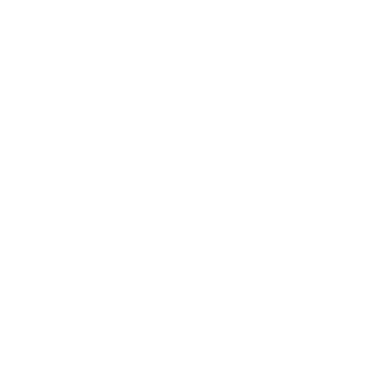

In [47]:
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import time

plt.ion()
fig, ax = plt.subplots()
a = dist
while True:
    # Update your NumPy array here
    # For example: image_array = read_pbm("updated_image.pbm")
    a = a.flatten()
    for i in range(256):
        sum = 0
        for j in range(256):
            sum += weights[i][j] * a[j]
        
        if sum > theta:
            a[i] = 1

    a = a.reshape(16,16)
    ax.clear()
    ax.set_axis_off()
    ax.imshow(a, cmap='binary')
    display(fig)
    clear_output(wait=True)
    time.sleep(1)

KeyboardInterrupt: 

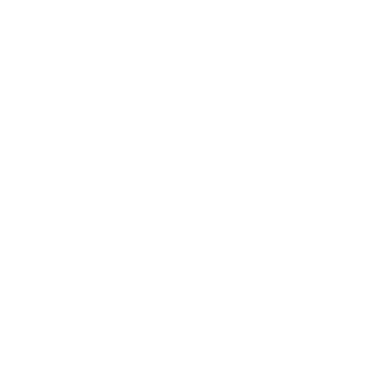

In [61]:
a = dist  # This should be your initial 1D NumPy array
weights = np.random.rand(256, 256)  # Example weights matrix, adjust as needed
theta = 0  # Example threshold, adjust as needed

plt.ion()
fig, ax = plt.subplots()

while True:
    # Update your NumPy array here (simulate a Hopfield network update)
    for i in range(256):
        sum = 0
        for j in range(256):
            sum += weights[i][j] * a[j]

        if sum > theta:
            a[i] = 1
        else:
            a[i] = -1  # Assuming the state can be -1 as well

    # Reshape the 1D array back to 16x16 for display
    a_reshaped = a.reshape(16, 16)

    # Clear and update the plot
    ax.clear()
    ax.set_axis_off()
    display_array = np.where(a_reshaped == -1, 0, 1)
    ax.imshow(a_reshaped, cmap='binary')  # Display the reshaped image
    display(fig)
    clear_output(wait=True)
    time.sleep(1)
    

KeyboardInterrupt: 

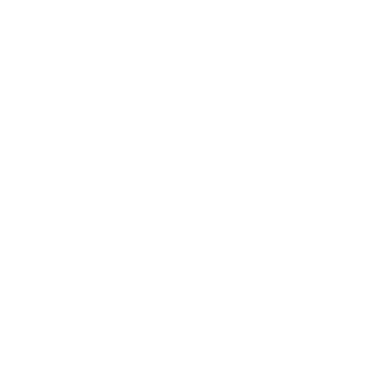

In [54]:
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import time
import numpy as np

# Example initial values for `a` (random -1 and 1)
a = np.random.choice([-1, 1], size=256)  # Create a random array with values -1 and 1
weights = np.random.rand(256, 256)  # Example random weights matrix, adjust as needed
theta = 0  # Example threshold, adjust as needed

plt.ion()
fig, ax = plt.subplots()

while True:
    # Update your NumPy array here (simulate a Hopfield network update)
    for i in range(256):
        sum = 0
        for j in range(256):
            sum += weights[i][j] * a[j]
        
        # Debugging: print the sum to check if it's changing
        # print(f"Sum for neuron {i}: {sum}")

        if sum > theta:
            a[i] = 1
        else:
            a[i] = -1  # Set to -1 if the sum is less than or equal to theta

    # Reshape the 1D array back to 16x16 for display
    a_reshaped = a.reshape(16, 16)

    # Debugging: print the reshaped array
    # print(a_reshaped)

    # Clear and update the plot
    ax.clear()
    ax.set_axis_off()
    
    # Use `cmap='binary'` but also ensure values are 0 and 1 for display
    # Convert `a_reshaped` values to 0 (for -1) and 1 (for 1) for proper display
    display_array = np.where(a_reshaped == -1, 0, 1)

    ax.imshow(display_array, cmap='binary')  # Display the reshaped image
    display(fig)
    clear_output(wait=True)
    time.sleep(1)

